In [1]:
#Import all the libraries that we are going to use in order to analyze the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

# customers — the table with unique customer ids
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-gombozhapov-35/olist_customers_dataset.csv')

# orders — the table with orders (I checked the table beforehand and found out that some columns are not in the date type, let's solve it by using parse_dates)
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-gombozhapov-35/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 
                                                             'order_approved_at',
                                                             'order_delivered_carrier_date',
                                                             'order_delivered_customer_date',
                                                             'order_estimated_delivery_date'])

# items — the items table (similar situation with the date column that we had with the orders dataset)
items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-e-gombozhapov-35/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [2]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [4]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# 1. 
What is the number of users we have who have made a purchase only once?

In [5]:
#Let's take a look at what kind of order statuses we have in the orders dataset
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [6]:
#I believe we should exclude the orders that were canceled or are unavailable. Therefore, we are going to take into account only the rest 6 order statuses
orders_delivered = orders.query("order_status != 'canceled' & order_status != 'unavailable'")
orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [7]:
orders_delivered.order_status.value_counts() #Exluded 1,234 orders (625 + 609)

delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

In [8]:
uniq_customers = customers[['customer_unique_id', 'customer_id']] #let's take only the two columns that we're interested in exploring from the customer dataset 

orders_with_uniq_id = pd.merge(orders_delivered, uniq_customers, how='left') #left join the uniq_customers dataset into orders_delivered
orders_with_uniq_id = orders_with_uniq_id[['order_id', 'customer_id', 'order_status', 'customer_unique_id']] #arrange the columns we need
orders_with_uniq_id.head()

,order_id,customer_id,order_status,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,72632f0f9dd73dfee390c9b22eb56dd6


In [9]:
#filter the DataFrame for rows where there was only 1 purchase and then return the number of rows in the resulting DataFrame
orders_with_uniq_id.groupby('customer_unique_id', as_index=False) \
                   .agg({'order_id': 'count'}) \
                   .query('order_id == 1').shape[0]

92102

In [60]:
uniq_customers = customers[['customer_unique_id', 'customer_id']]
uniq_customers.groupby('customer_unique_id').agg({'customer_id': 'count'})

,customer_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1
fffea47cd6d3cc0a88bd621562a9d061,1
ffff371b4d645b6ecea244b27531430a,1


In [61]:
92102 / 96096

0.958437395937396

92,102 users have made a purchase only once, which is around 96% out of the total number of users (96,096).

Which brings us to a conclusion that the items sold on the e-commerce platform are: 
- Big-ticket items: Products that are expensive and have a long lifespan, such as furniture, appliances, and electronics, are usually bought once and used for several years.
- Special-occasion items: Products that are used for special events or occasions, such as wedding dresses, tuxedos, and prom dresses, are typically bought once and used for that specific occasion.
- Unique or rare items: Products that are unique, rare, or collectible, such as vintage or limited-edition items, are often bought once by collectors or enthusiasts.

# 2. 
What is the average number of orders per month that are not delivered for various reasons (provide a breakdown by reasons)? 

In [10]:
#Filter out only the orders that haven't been delivered
monthly = orders[orders.order_status != 'delivered']
monthly.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [11]:
status = monthly.groupby('order_status', as_index=False) \
                .agg({'order_id' : 'count'}) \
                .rename(columns={'order_id' : 'number_of_orders'}) 

In [12]:
status.head(7)

,order_status,number_of_orders
0,approved,2
1,canceled,625
2,created,5
3,invoiced,314
4,processing,301
5,shipped,1107
6,unavailable,609


In [62]:
monthly['estimated_delivery'] = monthly.order_estimated_delivery_date.apply(lambda x: x.strftime('%Y-%m'))
monthly

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_delivery
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-05
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-06
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-10
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,2018-02
...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,2018-10
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,2018-02
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,2018-09
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,2017-09


In [14]:
monthly_orders = monthly.groupby(['estimated_delivery', 'order_status']) \
          .agg({'order_id': 'count'}) \
          .rename(columns={'order_id': 'quantity'}).reset_index()

In [15]:
monthly_orders.head()

,estimated_delivery,order_status,quantity
0,2016-09,canceled,1
1,2016-10,canceled,3
2,2016-10,shipped,1
3,2016-11,canceled,14
4,2016-11,invoiced,9


In [64]:
monthly_orders.groupby('order_status', as_index=False) \
           .agg({'quantity': 'mean'}) \
           .round(1) \
           .sort_values('quantity', ascending=False)

,order_status,quantity
5,shipped,48.1
6,unavailable,29.0
1,canceled,24.0
4,processing,15.8
3,invoiced,15.0
2,created,1.7
0,approved,1.0


1) Aside from the delivered items, most orders are shipped, which is a good thing. However, they might not be delivered to the customer within a one month span due to long estimated date of arrival.

2) Next, 29 orders on average are unavailable. It may be related to the fact that a partical item maybe run out of stock but is still listed on the website. Another reason may be related to quality issue. Therefore, I suggest this e-commerce platform to pay more attention to their inventory management and incoming quality control. 

3) Third, 24 orders on average are canceled. This may be related to the fact that a lot of purchases made by the customers are made due to impulsive buying. In other words, after reconsideration, the customer may realize that this particular item is not necessary and they simply cancel their orders. High delivery fee and long ETA dates might also contribute to orders being canceled. 

# 3. 
For each product, determine on which day of the week the product is most frequently purchased.

In [17]:
orders_items = orders.merge(items, on='order_id', how='left') #Merge orders and items Datasets
orders_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [18]:
orders_items['day_of_the_week'] = orders_items['order_purchase_timestamp'].dt.day_name() #Get the day of the week from the purchasing date
orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_the_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [19]:
orders_items.product_id.nunique()

32951

In [20]:
orders_items = orders_items.groupby(['product_id', 'day_of_the_week']) \
                           .agg({'price': 'count'}) \
                           .reset_index()

orders_items.pivot(index='product_id', columns='day_of_the_week', values='price') \
            .idxmax(axis=1) \
            .to_frame() \
            .reset_index() \
            .rename(columns={0:'most_frequently_bought'})

,product_id,most_frequently_bought
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,Saturday
32947,fff81cc3158d2725c0655ab9ba0f712c,Monday
32948,fff9553ac224cec9d15d49f5a263411f,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday


Considering the fact that this is an e-commerce platform, it is difficult to make any assumptions as to what kind of products these are based on the most frequently day of purchase: 

1) Big-ticket items: Consumers may be more likely to research and purchase big-ticket items on weekdays, when they have access to their work computers and may have more time to research and compare options. However, some consumers may also browse and make purchases on weekends, especially if they have more free time or are more comfortable making purchases from home.

2) Special-occasion items: Consumers may be more likely to search and purchase special-occasion items on weekdays, as they may need to plan ahead and schedule fittings or consultations with the retailer or designer. However, some consumers may also browse and purchase on weekends, especially if they have a specific event coming up or need to receive the item quickly.

3) Unique or rare items: Consumers who are interested in unique or rare items may be more likely to browse and make purchases on weekends, as they may have more leisure time to explore specialized online marketplaces or auction sites. However, some collectors or enthusiasts may also make purchases on weekdays, depending on their personal schedule and preferences.

# 4. 
What is the average number of purchases per week for each user (by month)? 

In [79]:
avg_buys = orders.query("order_status == 'delivered'") \
                .merge(customers, how='left', on='customer_id') \
                [['customer_id', 'customer_unique_id', 'order_id', 'order_purchase_timestamp']]
avg_buys.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


In [80]:
avg_buys['month'] = avg_buys.order_purchase_timestamp.dt.month_name()
avg_buys['days_in_month'] = avg_buys.order_purchase_timestamp.dt.days_in_month
avg_buys['number_of_weeks'] = (avg_buys['days_in_month'] / 7).round(2)
avg_buys.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,month,days_in_month,number_of_weeks
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,October,31,4.43
1,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,July,31,4.43
2,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,August,31,4.43
3,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,November,30,4.29
4,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,February,28,4.00


In [81]:
avg_buys = avg_buys.groupby(['customer_unique_id', 'number_of_weeks', 'month'], as_index=False).agg({'order_id': 'count'}).rename(columns={'order_id': 'purchases'})
avg_buys['weekly_purchases'] = (avg_buys['purchases'] / avg_buys['number_of_weeks']).round(2)
avg_buys.head()

,customer_unique_id,number_of_weeks,month,purchases,weekly_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,4.43,May,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.43,May,1,0.23
2,0000f46a3911fa3c0805444483337064,4.43,March,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,4.43,October,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,4.29,November,1,0.23


In [82]:
avg_buys.sort_values('weekly_purchases', ascending=False)

,customer_unique_id,number_of_weeks,month,purchases,weekly_purchases
7097,12f5d6e1cbf93dafd9dcc19095df0b3d,4.43,January,6,1.35
23211,3e43e6105506432c953e165fb2acf44c,4.00,February,4,1.00
67329,b4e4f24de1e8725b74e4a1f4975116ed,4.00,February,4,1.00
60341,a239b8e2fbce33780f1f1912e2ee5275,4.00,February,4,1.00
65740,b08fab27d47a1eb6deda07bfd965ad43,4.29,September,4,0.93
...,...,...,...,...,...
33257,592eac42cd018a90af006cc5495ebaf9,4.43,May,1,0.23
33256,592e1410dfd33a224a4377e9586d5519,4.29,November,1,0.23
33255,592de7c5eef333c04b18e949537061a8,4.29,November,1,0.23
33253,592d090bb075fa8fb9d6aa816a3ed86d,4.29,November,1,0.23


Again, we see that the highest number of weekly purchases is 1.35. Which confirms our assumption that this e-commerce platform sells only big-ticket, special-occasion, and unique or rare items. 

# 5. 
Using pandas, conduct a cohort analysis of users. In the period from January to December, identify the cohort with the highest retention rate in the third month.

In [24]:
#Merge the orders and the customers datasets
#Create a new column called 'order month' to extract only Year and Month from the 'order_purchase_timestamp' column
cohorts = orders.merge(customers, how='left', on='customer_id') \
                 [['customer_unique_id', 'order_purchase_timestamp']]
cohorts['order_month'] = cohorts.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))
cohorts.head()

,customer_unique_id,order_purchase_timestamp,order_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02


In [25]:
#Create a new column called 'join_month' to indicate where every unique user placed the first purchase
#The orders_num column is initialized to 0 for all rows in the cohorts DataFrame as it will be incremented later based on the number of orders made by each customer in each cohort
cohorts.set_index('customer_unique_id', inplace=True)
cohorts['join_month'] = cohorts.groupby(level=0)['order_purchase_timestamp'].min().apply(lambda x: x.strftime('%Y-%m'))
cohorts.reset_index(inplace=True)
cohorts.insert(len(cohorts.columns), 'orders_num', 0, allow_duplicates=False)
cohorts.head()

,customer_unique_id,order_purchase_timestamp,order_month,join_month,orders_num
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-09,0
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08,0
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11,0
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,2018-02,0


In [26]:
#Form cohorts
cohorts_1 = cohorts.groupby(['join_month', 'order_month']) \
                   .agg({'customer_unique_id': pd.Series.nunique, 'orders_num': pd.Series.count}) \
                   .rename(columns={'customer_unique_id': 'total_customers'})
cohorts_1.head()

total_customers  orders_num
join_month order_month                             
2016-09    2016-09                    4           4
2016-10    2016-10                  321         324
           2017-04                    1           1
           2017-07                    1           1
           2017-09                    1           1

In [27]:
def CohortPeriod(C):
    C['cohort_period'] = np.arange(len(C)) + 0
    return C
cohorts_1 = cohorts_1.groupby(level=0).apply(CohortPeriod)
cohorts_1.head()

total_customers  orders_num  cohort_period
join_month order_month                                            
2016-09    2016-09                    4           4              0
2016-10    2016-10                  321         324              0
           2017-04                    1           1              1
           2017-07                    1           1              2
           2017-09                    1           1              3

In [28]:
cohorts_1.reset_index(inplace=True)
cohorts_1.set_index(['cohort_period', 'join_month'], inplace=True)
cohorts_1.head()

order_month  total_customers  orders_num
cohort_period join_month                                         
0             2016-09        2016-09                4           4
              2016-10        2016-10              321         324
1             2016-10        2017-04                1           1
2             2016-10        2017-07                1           1
3             2016-10        2017-09                1           1

In [29]:
cohort_group_size = cohorts_1['total_customers'].groupby(level=1).first()
cohorts_1['total_customers'].unstack(0)

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
join_month,,,,,,,,,,,,,,,,,,
2016-09,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,321.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN


In [30]:
retention_rate = cohorts_1['total_customers'].unstack(0).divide(cohort_group_size, axis=0)
retention_rate

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
join_month,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,0.003115,0.003115,0.003115,0.003115,0.003115,0.003115,0.006231,0.006231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.003927,0.002618,0.001309,0.003927,0.001309,0.005236,0.001309,0.001309,0.003927,0.001309,0.007853,0.003927,0.001309,0.001309,0.002618,0.003927,0.001309
2017-02,1.0,0.002283,0.002854,0.001142,0.003995,0.001142,0.002283,0.001712,0.001712,0.002283,0.001142,0.002854,0.001712,0.001712,0.001142,0.000571,0.000571,0.002283
2017-03,1.0,0.004932,0.003794,0.003794,0.003414,0.001517,0.001517,0.003035,0.003414,0.000759,0.003794,0.001517,0.002276,0.001138,0.001517,0.002276,0.000759,0.001517
2017-04,1.0,0.005952,0.002126,0.001701,0.003401,0.002551,0.003401,0.002976,0.002976,0.001701,0.002551,0.000850,0.000850,0.000425,0.000850,0.000850,0.002126,NaN
2017-05,1.0,0.005006,0.005006,0.003893,0.003059,0.003337,0.004171,0.001669,0.002503,0.003059,0.002503,0.003337,0.002503,0.000278,0.001947,0.002503,NaN,NaN
2017-06,1.0,0.004779,0.003504,0.004141,0.002549,0.003823,0.003823,0.002230,0.001274,0.002230,0.003186,0.003504,0.001593,0.001274,0.001911,NaN,NaN,NaN


In [31]:
cohort_analysis = (retention_rate
            .style
            .set_caption('Reteation rate (Cohort Analysis)') 
            .background_gradient(cmap='coolwarm')
            .highlight_null('white') 
            .format("{:.2%}", na_rep=""))
cohort_analysis

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
join_month,,,,,,,,,,,,,,,,,,
2016-09,100.00%,,,,,,,,,,,,,,,,,
2016-10,100.00%,0.31%,0.31%,0.31%,0.31%,0.31%,0.31%,0.62%,0.62%,,,,,,,,,
2016-12,100.00%,100.00%,,,,,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,0.39%,0.13%,0.79%,0.39%,0.13%,0.13%,0.26%,0.39%,0.13%
2017-02,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,0.29%,0.17%,0.17%,0.11%,0.06%,0.06%,0.23%
2017-03,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%
2017-04,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.21%,
2017-05,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.25%,0.33%,0.25%,0.03%,0.19%,0.25%,,
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,,,


A cohort with the highest retention rate on a third month comes from the users that made the first purchase in June - 0.41% which is still an extremely low percentage. It would be weird to assume that we could get a higher number considering that the vast majority of our users make purchases only once.

# 6. 
Often for qualitative audience analysis, segmentation-based approaches are used. Create an RFM segmentation of users to assess audience quality. In clustering, selected the following metrics: R (recency) - time from the user's last purchase to the current date, F (frequency) - total number of purchases by the user over time, M (monetary value) - total amount of purchases over time. For each RFM segment, created boundaries for the recency, frequency, and monetary metrics for interpreting these clusters.

In [32]:
customers_orders = customers.merge(orders, on = 'customer_id')

In [33]:
merged_df = customers_orders.merge(items, on ='order_id') \
    [['customer_id', 'customer_unique_id', 'order_purchase_timestamp', 'order_id','price']] #merged all three datasets

In [34]:
merged_df.head()

,customer_id,customer_unique_id,order_purchase_timestamp,order_id,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,00e7ee1b050b8499577073aeb2a297a1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,29150127e6685892b6eab3eec79f59c7,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,b2059ed67ce144a36e2aa97d2c9e9ad2,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,951670f92359f4fe4a63112aa7306eba,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,6b7d50bd145f6fc7f33cebabd7e49d0f,230.00


In [35]:
#Calculate RFM scores
NOW = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)
merged_df['recency'] = (NOW - merged_df['order_purchase_timestamp']).dt.days
aggr = {
    'recency': 'min', # the number of days since last order (Recency)
    'order_id': 'nunique', # the total number of orders (Frequency)
    'price': 'sum' # the total revenue (Monetary value)
}

In [36]:
NOW #Considered as "today's date", which is the next day after the most recent transaction that we got by using the max() function

Timestamp('2018-09-04 09:06:57')

In [37]:
aggr #that's the function that we are going to use for our aggregate function below:

{'recency': 'min', 'order_id': 'nunique', 'price': 'sum'}

In [38]:
rfm = merged_df.groupby('customer_unique_id').agg(aggr).reset_index().rename(columns={'order_id': 'frequency', 'price': 'monetary_value'})

In [39]:
rfm.head()

,customer_unique_id,recency,frequency,monetary_value
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


When doing a segmentation, it is recommended to have no more than 4 different segments. Thus, the quantiles of 0.25, 0.5, and 0.75 were selected.
- The more recent a transaction is, the better recency score it should get
- As for the frequency and monetary value, it is quite opposite. The higher the number, the higher a score should be. 

In [40]:
#The quantiles of the recency
quantiles_recency = rfm['recency'].quantile([0.25, 0.5, 0.75, 1.0])
quantiles_recency

0.25    119.0
0.50    224.0
0.75    353.0
1.00    729.0
Name: recency, dtype: float64

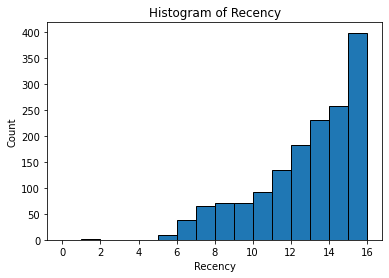

In [41]:
# Plot a histogram of the "frequency" variable
plt.hist(rfm['recency'], bins=range(0, 17), edgecolor='black')

# Set the title and labels
plt.title('Histogram of Recency')
plt.xlabel('Recency')
plt.ylabel('Count')

# Show the plot
plt.show()

In [42]:
quantiles_frequency = rfm['frequency'].quantile([0.25, 0.5, 0.75, 1.0])

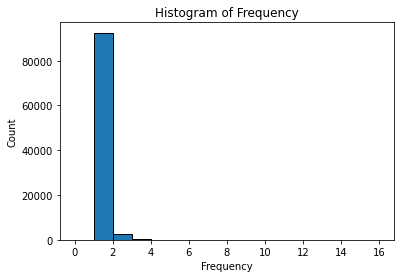

In [43]:
# Plot a histogram of the "frequency" variable
plt.hist(rfm['frequency'], bins=range(0, 17), edgecolor='black')

# Set the title and labels
plt.title('Histogram of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')

# Show the plot
plt.show()

The histogram looks heavily skewed to the value of 1. In other words, the vast majority of our customers purchased the product only once. Therefore, it may be a great idea to make 4 groupes based on the quantity of their purchases, not the quantiles:
- 1 purchase
- 2 purchases
- 3 purchases
- 4 purchases or more

In [44]:
quantiles_mv = rfm['monetary_value'].quantile([0.25, 0.5, 0.75, 1.0])
quantiles_mv

0.25       47.9
0.50       89.9
0.75      155.0
1.00    13440.0
Name: monetary_value, dtype: float64

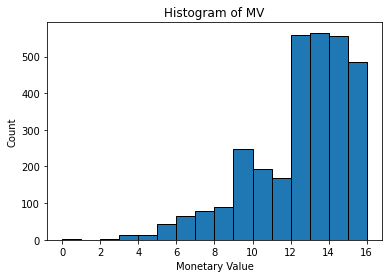

In [45]:
# Plot a histogram of the "monetary_value" variable
plt.hist(rfm['monetary_value'], bins=range(0, 17), edgecolor='black')

# Set the title and labels
plt.title('Histogram of MV')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

# Show the plot
plt.show()

In [46]:
#Segment the customers
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75]) 
def RScore (x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
def FScore (x):
    if x == 0:
        return 1
    elif x == 1:
        return 2
    elif x == 2:
        return 3
    else:
        return 4
def MScore (x, p, d): 
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
rfm['R'] = rfm['recency'].apply(RScore, args=('recency', quantiles))
rfm['F'] = rfm['frequency'].apply(FScore)
rfm['M'] = rfm['monetary_value'].apply(MScore, args=('monetary_value', quantiles))
rfm['RFM'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [47]:
rfm.head()

,customer_unique_id,recency,frequency,monetary_value,R,F,M,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,2,3,423
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,2,1,421
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,2,2,122
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,2,1,221
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,2,4,224


# Defining the segments
- Best Customers – This group consists of those customers who are found in R-Tier-1, F-Tier-1 and M-Tier-1, meaning that they transacted recently, do so often and spend more than other customers. A shortened notation for this segment is 4-4-4; we’ll use this notation going forward.
- High-Spending New Customers – This group consists of those customers in 4-1-1 and 4-1-2. These are customers who transacted only once, but very recently and they spent a lot. A shortened notation for this segment is 4-1-X, where X is either 1 or 2.
- Lowest-Spending Active Loyal Customers – This group consists of those customers in segments 4-4-1 and 4-4-2 (they transacted recently and do so often, but spend the least). A shortened notation for this segment is 4-4-1/2.
- Churned Best Customers – This segment consists of those customers in groups 1-4-4 and 2-4-4 (they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted).

In [48]:
# Define the segment definitions
best_customers = ['4-4-4']
high_spending_new_customers = ['4-1-4', '4-2-4']
lowest_spending_active_loyal_customers = ['4-4-1', '4-4-2']
churned_best_customers = ['1-4-4', '2-4-4']

In [49]:
# Create a new column with the RFM segment for each customer
rfm['RFM_segment'] = rfm['R'].astype(str) + '-' + rfm['F'].astype(str) + '-' + rfm['M'].astype(str)

In [50]:
# Assign the segment names to each RFM segment
rfm.loc[rfm['RFM_segment'].isin(best_customers), 'segment_name'] = 'Best Customers'
rfm.loc[rfm['RFM_segment'].isin(high_spending_new_customers), 'segment_name'] = 'High-Spending New Customers'
rfm.loc[rfm['RFM_segment'].isin(lowest_spending_active_loyal_customers), 'segment_name'] = 'Lowest-Spending Active Loyal Customers'
rfm.loc[rfm['RFM_segment'].isin(churned_best_customers), 'segment_name'] = 'Churned Best Customers'

In [51]:
# Filter the customers based on whether their segment_name is not null
segmented_customers = rfm[rfm['segment_name'].notnull()]

# Print the number of customers in each segment
print(segmented_customers['segment_name'].value_counts())

High-Spending New Customers               5460
Best Customers                              71
Churned Best Customers                      67
Lowest-Spending Active Loyal Customers       4
Name: segment_name, dtype: int64


In [52]:
# Get the counts of customers in each segment
segment_counts = segmented_customers['segment_name'].value_counts()

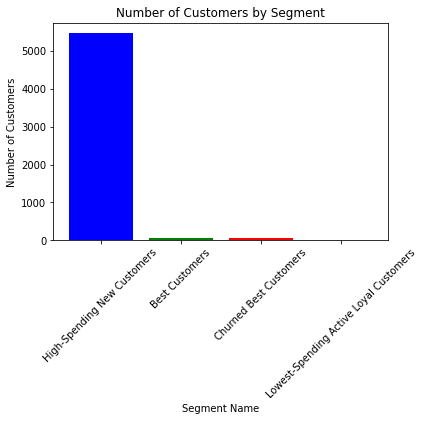

In [53]:
# Define the colors for each segment
colors = ['blue', 'green', 'red', 'purple']

# Filter the customers based on whether their segment_name is not null
segmented_customers = rfm[rfm['segment_name'].notnull()]

# Get the counts of customers in each segment
segment_counts = segmented_customers['segment_name'].value_counts()

# Create a bar chart of the counts with colors assigned
plt.bar(segment_counts.index, segment_counts.values, color=colors)

# Set the chart title and labels for the axes
plt.title('Number of Customers by Segment')
plt.xlabel('Segment Name')
plt.ylabel('Number of Customers')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

In [54]:
segmented_customers.query("segment_name == 'Churned Best Customers'")

,customer_unique_id,recency,frequency,monetary_value,R,F,M,RFM,RFM_segment,segment_name
3935,0a609db8d244100909a15d65eadf8539,320,3,437.88,2,4,4,244,2-4-4,Churned Best Customers
3938,0a61b571f594b6919601bcf3380da7f7,234,3,435.79,2,4,4,244,2-4-4,Churned Best Customers
4796,0cc2ee1112a11a1094eff52fa2e87150,335,3,759.80,2,4,4,244,2-4-4,Churned Best Customers
5343,0e4cb268bd62da7db135af6349b4fc2a,283,3,157.99,2,4,4,244,2-4-4,Churned Best Customers
11152,1da09dd64e235e7c2f29a4faff33535c,235,3,1980.28,2,4,4,244,2-4-4,Churned Best Customers
...,...,...,...,...,...,...,...,...,...,...
88223,ec7f1811826ab04a27a92197bc40c888,259,4,487.89,2,4,4,244,2-4-4,Churned Best Customers
90705,f34cd7fd85a1f8baff886edf09567be3,345,4,1047.00,2,4,4,244,2-4-4,Churned Best Customers
91379,f50ca6544a0ed8a52cc964e15cbe9cf9,328,3,283.30,2,4,4,244,2-4-4,Churned Best Customers
91871,f64ec6d8dd29940264cd0bbb5ecade8a,286,4,288.00,2,4,4,244,2-4-4,Churned Best Customers


In [55]:
segmented_customers.query("segment_name == 'High-Spending New Customers'")

,customer_unique_id,recency,frequency,monetary_value,R,F,M,RFM,RFM_segment,segment_name
22,000fbf0473c10fc1ab6f8d2d286ce20c,39,1,285.80,4,2,4,424,4-2-4,High-Spending New Customers
53,0025795df7a7d077c4c90162fa820085,41,1,177.90,4,2,4,424,4-2-4,High-Spending New Customers
72,003162bf0351f47a1a247992b8b9b42d,51,1,514.90,4,2,4,424,4-2-4,High-Spending New Customers
76,0033f4a2887e07e25aa1204d482f41ba,70,1,350.00,4,2,4,424,4-2-4,High-Spending New Customers
77,00344274804f3b8003de1b0562ae01df,56,1,188.00,4,2,4,424,4-2-4,High-Spending New Customers
...,...,...,...,...,...,...,...,...,...,...
95308,ffb1cf5736b51e47fec82cf40dd26303,99,1,239.90,4,2,4,424,4-2-4,High-Spending New Customers
95348,ffcb3eb07f2a033d45949fcecd160d98,114,1,185.81,4,2,4,424,4-2-4,High-Spending New Customers
95388,ffe96c782a5bc522bd8bad3bc638981a,35,1,209.99,4,2,4,424,4-2-4,High-Spending New Customers
95396,ffeddf8aa7cdecf403e77b2e9a99e2ea,113,1,165.00,4,2,4,424,4-2-4,High-Spending New Customers


In [56]:
segmented_customers.query("segment_name == 'Best Customers'")

,customer_unique_id,recency,frequency,monetary_value,R,F,M,RFM,RFM_segment,segment_name
1085,02e9109b7e0a985108b43e573b6afb23,112,3,532.87,4,4,4,444,4-4-4,Best Customers
2885,07b1b60bca2b6326fa2adb259ea4a55f,117,3,190.40,4,4,4,444,4-4-4,Best Customers
3106,083ca1aa470c280236380973a48f77c6,21,4,218.88,4,4,4,444,4-4-4,Best Customers
3370,08e5b38d7948d37fbb2a59fc5e175ab1,117,4,866.79,4,4,4,444,4-4-4,Best Customers
9074,182053495bc94c2f41090ce8c41be266,15,3,169.70,4,4,4,444,4-4-4,Best Customers
...,...,...,...,...,...,...,...,...,...,...
82231,dc48b0a1b0e6abb6586f322c189f6b93,14,3,253.70,4,4,4,444,4-4-4,Best Customers
82305,dc813062e0fc23409cd255f7f53c7074,12,6,687.76,4,4,4,444,4-4-4,Best Customers
84396,e226254ce0c6d5b7a7ef7218c9b5b518,118,3,584.60,4,4,4,444,4-4-4,Best Customers
92752,f8bc1d81f395f6239a2a5ab1b9edf1ab,14,3,318.54,4,4,4,444,4-4-4,Best Customers


In [57]:
segmented_customers.query("segment_name == 'Lowest-Spending Active Loyal Customers'")

,customer_unique_id,recency,frequency,monetary_value,R,F,M,RFM,RFM_segment,segment_name
10289,1b6e96ed99cb8d135efe220d761bbd67,19,3,70.69,4,4,2,442,4-4-2,Lowest-Spending Active Loyal Customers
39767,6a6a7141119ceaeca4dfbae7a580a515,46,3,78.29,4,4,2,442,4-4-2,Lowest-Spending Active Loyal Customers
83784,e0836a97eaae86ac4adc26fbb334a527,7,3,62.98,4,4,2,442,4-4-2,Lowest-Spending Active Loyal Customers
84058,e13e8b789e5a8e6fe1445f924a4ed4f6,94,3,76.47,4,4,2,442,4-4-2,Lowest-Spending Active Loyal Customers


- Best Customers: To retain these customers, the e-commerce platform could offer personalized incentives and rewards, such as exclusive discounts or early access to new products, to encourage them to continue transacting on the platform. The platform could also provide excellent customer service and support to ensure that these customers feel valued and appreciated.

- High-Spending New Customers: offering additional incentives and rewards for their second purchase, such as a discount or free gift might be beneficial to retain them. The platform could also send personalized follow-up emails to thank these customers for their purchase and encourage them to return to the platform.

- Lowest-Spending Active Loyal Customers: The e-commerce platform could provide incentives to encourage those customers to increase their spending, such as a loyalty program or points system that rewards customers for making more purchases. The platform could also offer personalized product recommendations and promotions based on the customer's purchase history and preferences.

- Churned Best Customers: I'd suggest offering win-back promotions or discounts to encourage those customers to return to the platform. The platform could also conduct surveys or reach out to these customers to understand why they stopped transacting and address any concerns or issues they may have had with the platform.